In [1]:
 # TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow import keras
 #import keras.utils
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD

 # Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re

 # Pillow
import PIL
from PIL import Image
print ("TenserFlow version: " +tf.__version__)

TenserFlow version: 2.0.0


In [2]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
                if re.match('chihuahua.*', file):
                        images.append(img)
                        labels.append(0)
                elif re.match('muffin.*', file):
                        images.append(img)
                        labels.append(1)
        return (np.asarray(images), np.asarray(labels))

In [3]:
maxsize_w = 100
maxsize_h = 100

maxsize = maxsize_w, maxsize_h

(train_images, train_labels) = load_image_dataset('./chihuahua-muffin/train_set/', maxsize)
(test_images, test_labels) = load_image_dataset('../test_set/', maxsize)

In [4]:
train_images.shape
print(test_labels)
class_names = ['chihuahua', 'muffin']
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])
                

[1 1 0 0 0 1 0 1 0 1 0 1 1 0]


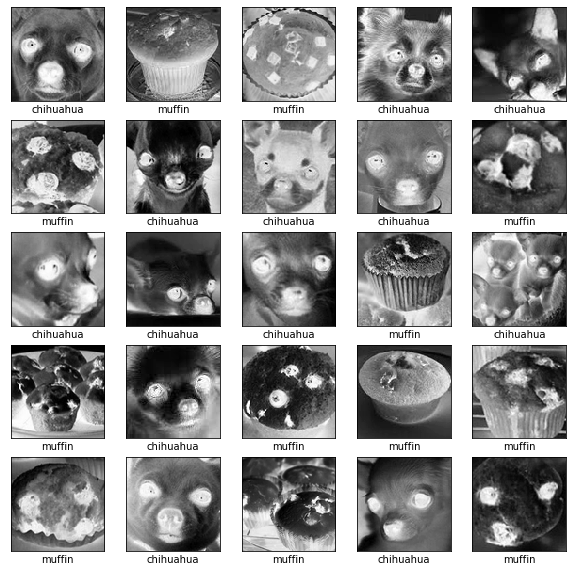

In [5]:
display_images(train_images, train_labels)
plt.show()


In [6]:
#from keras.layers import Dense, Activation, Flatten #используем такие типыслоев из библиотеки keras
#import tensorflow as tf
#from tensorflow.keras import models

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

train_images = train_images / 255.0
test_images = test_images / 255.0

 # Setting up the layers.

first_model = Sequential([
    Flatten(input_shape=(100, 100)),
    Dense(128, activation=tf.nn.sigmoid),
    Dense(16, activation=tf.nn.sigmoid),
    Dense(2, activation=tf.nn.sigmoid)
])
sgd = SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)

first_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

first_model_history=first_model.fit(train_images, train_labels, epochs=100)



Train on 26 samples
Epoch 1/100
26/26 [==============================] - 1s 21ms/sample - loss: 0.7184 - accuracy: 0.5000
Epoch 2/100
26/26 [==============================] - 0s 351us/sample - loss: 0.7157 - accuracy: 0.5000
Epoch 3/100
26/26 [==============================] - 0s 319us/sample - loss: 0.7127 - accuracy: 0.5000
Epoch 4/100
26/26 [==============================] - 0s 367us/sample - loss: 0.7095 - accuracy: 0.5000
Epoch 5/100
26/26 [==============================] - 0s 345us/sample - loss: 0.7066 - accuracy: 0.5000
Epoch 6/100
26/26 [==============================] - 0s 322us/sample - loss: 0.7040 - accuracy: 0.5000
Epoch 7/100
26/26 [==============================] - 0s 421us/sample - loss: 0.7016 - accuracy: 0.5000
Epoch 8/100
26/26 [==============================] - 0s 335us/sample - loss: 0.6997 - accuracy: 0.5000
Epoch 9/100
26/26 [==============================] - 0s 359us/sample - loss: 0.6979 - accuracy: 0.5000
Epoch 10/100
26/26 [==============================] - 

Epoch 80/100
26/26 [==============================] - 0s 450us/sample - loss: 0.6441 - accuracy: 0.7308
Epoch 81/100
26/26 [==============================] - 0s 395us/sample - loss: 0.6432 - accuracy: 0.7308
Epoch 82/100
26/26 [==============================] - 0s 365us/sample - loss: 0.6423 - accuracy: 0.7308
Epoch 83/100
26/26 [==============================] - 0s 349us/sample - loss: 0.6413 - accuracy: 0.7692
Epoch 84/100
26/26 [==============================] - 0s 300us/sample - loss: 0.6404 - accuracy: 0.8077
Epoch 85/100
26/26 [==============================] - 0s 300us/sample - loss: 0.6395 - accuracy: 0.8077
Epoch 86/100
26/26 [==============================] - 0s 418us/sample - loss: 0.6385 - accuracy: 0.8077
Epoch 87/100
26/26 [==============================] - 0s 442us/sample - loss: 0.6376 - accuracy: 0.8077
Epoch 88/100
26/26 [==============================] - 0s 339us/sample - loss: 0.6366 - accuracy: 0.8077
Epoch 89/100
26/26 [==============================] - 0s 338us/s

In [7]:
test_loss, test_acc = first_model.evaluate(test_images, test_labels)
print('Tesst accuracy:', test_acc)

14/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 7ms/sample - loss: 0.6811 - accuracy: 0.5000
Tesst accuracy: 0.5


In [8]:
Second_model = Sequential([
    Flatten(input_shape=(100, 100)),
    Dense(128, activation=tf.nn.sigmoid),
    Dense(1, activation=tf.nn.sigmoid),
    Dense(2, activation=tf.nn.sigmoid)
])

In [9]:
Second_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Second_model_history=Second_model.fit(train_images, train_labels, epochs=100)

Train on 26 samples
Epoch 1/100
26/26 [==============================] - 0s 19ms/sample - loss: 0.7855 - accuracy: 0.5000
Epoch 2/100
26/26 [==============================] - 0s 345us/sample - loss: 0.7756 - accuracy: 0.5000
Epoch 3/100
26/26 [==============================] - 0s 289us/sample - loss: 0.7643 - accuracy: 0.5000
Epoch 4/100
26/26 [==============================] - 0s 314us/sample - loss: 0.7529 - accuracy: 0.5000
Epoch 5/100
26/26 [==============================] - 0s 272us/sample - loss: 0.7424 - accuracy: 0.5000
Epoch 6/100
26/26 [==============================] - 0s 265us/sample - loss: 0.7331 - accuracy: 0.5000
Epoch 7/100
26/26 [==============================] - 0s 252us/sample - loss: 0.7252 - accuracy: 0.5000
Epoch 8/100
26/26 [==============================] - 0s 308us/sample - loss: 0.7186 - accuracy: 0.5000
Epoch 9/100
26/26 [==============================] - 0s 310us/sample - loss: 0.7132 - accuracy: 0.5000
Epoch 10/100
26/26 [==============================] - 

Epoch 80/100
26/26 [==============================] - 0s 286us/sample - loss: 0.6892 - accuracy: 0.6154
Epoch 81/100
26/26 [==============================] - 0s 340us/sample - loss: 0.6892 - accuracy: 0.6154
Epoch 82/100
26/26 [==============================] - 0s 465us/sample - loss: 0.6892 - accuracy: 0.6154
Epoch 83/100
26/26 [==============================] - 0s 315us/sample - loss: 0.6891 - accuracy: 0.6154
Epoch 84/100
26/26 [==============================] - 0s 283us/sample - loss: 0.6891 - accuracy: 0.6154
Epoch 85/100
26/26 [==============================] - 0s 288us/sample - loss: 0.6890 - accuracy: 0.6538
Epoch 86/100
26/26 [==============================] - 0s 366us/sample - loss: 0.6890 - accuracy: 0.6538
Epoch 87/100
26/26 [==============================] - 0s 299us/sample - loss: 0.6889 - accuracy: 0.6538
Epoch 88/100
26/26 [==============================] - 0s 345us/sample - loss: 0.6889 - accuracy: 0.6538
Epoch 89/100
26/26 [==============================] - 0s 278us/s

In [10]:
test_loss, test_acc = Second_model.evaluate(test_images, test_labels)
print('Tesst accuracy:', test_acc)

14/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 7ms/sample - loss: 0.6905 - accuracy: 0.6429
Tesst accuracy: 0.64285713


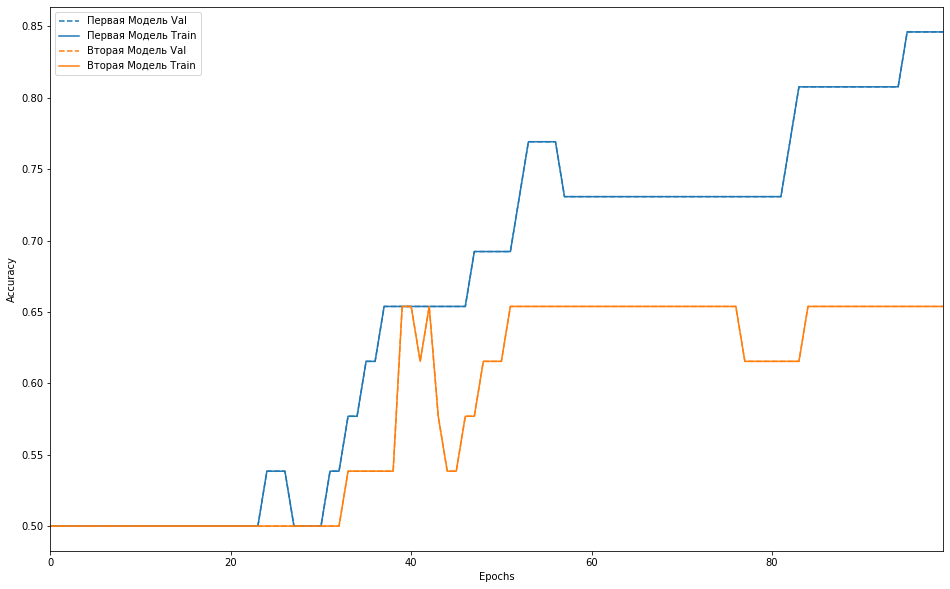

In [11]:
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history[key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
plot_history([('Первая модель', first_model_history),
              ('Вторая модель', Second_model_history)])